In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [5]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
slf_df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## KNN with K-Fold Cross Validation
- Finding the best performing random state by looping from 1 to 50
- Using 10 folds
- Looping from 1 to 21 for the number of neighbors
- Saving anything above 0.89 accuracy to evaluate

In [6]:
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])
 
splits = KFold(n_splits=10)

for k in range(1, 30, 2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_sub_train = X_train[train_index]
        X_val = X_train[val_index]
        y_sub_train = y_train[train_index]
        y_val = y_train[val_index]
            
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_sub_train, y_sub_train)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print(k, np.mean(scores))

[[34, 1, 0.8954545454545453], [40, 13, 0.8909090909090909], [40, 15, 0.8920454545454545], [40, 27, 0.8909090909090909], [40, 29, 0.8920454545454545], [48, 3, 0.8931818181818182]]


## Confusion Matrix to visualize classification accuracy
- Using the best performing random state and number of neighbors
- Calculate the accuracy score of the training and testing data
- Plot on Confusion Matrix to visualize the predicting accuracy

1.0


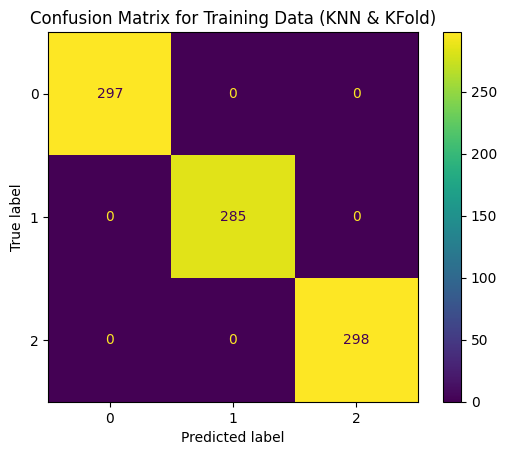

0.8818181818181818


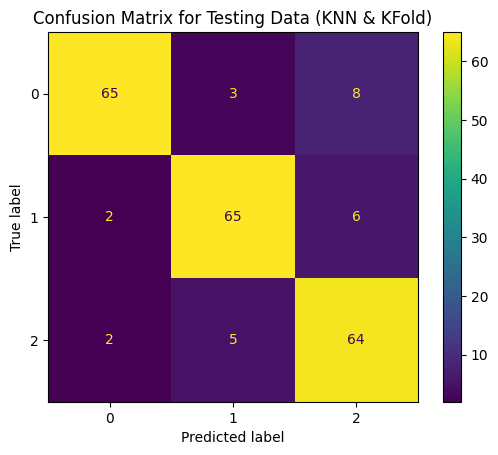

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, train_size=0.8)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & KFold)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & KFold)")
plt.show()



## Linear SVC Attempt
Use Linear SVC on the data to determine if it can predict the stress level of a new student based on the similarity of their stress factors to those of known students.
While KNN provides pretty decent results, it would be interesting to see how this does and compare the two.

max_iter and C values:  1000 0.01           ->  0.8454545454545455
max_iter and C values:  1000 0.1           ->  0.8454545454545455
max_iter and C values:  1000 1           ->  0.8363636363636363
max_iter and C values:  1000 10           ->  0.8545454545454545
max_iter and C values:  1000 100           ->  0.7272727272727273
max_iter and C values:  1000 1000           ->  0.8181818181818182
max_iter and C values:  10000 0.01           ->  0.8454545454545455
max_iter and C values:  10000 0.1           ->  0.8454545454545455
max_iter and C values:  10000 1           ->  0.8454545454545455
max_iter and C values:  10000 10           ->  0.8363636363636363
max_iter and C values:  10000 100           ->  0.8272727272727273
max_iter and C values:  10000 1000           ->  0.6454545454545455
max_iter and C values:  100000 0.01           ->  0.8454545454545455
max_iter and C values:  100000 0.1           ->  0.8454545454545455
max_iter and C values:  100000 1           ->  0.8272727272727273
m

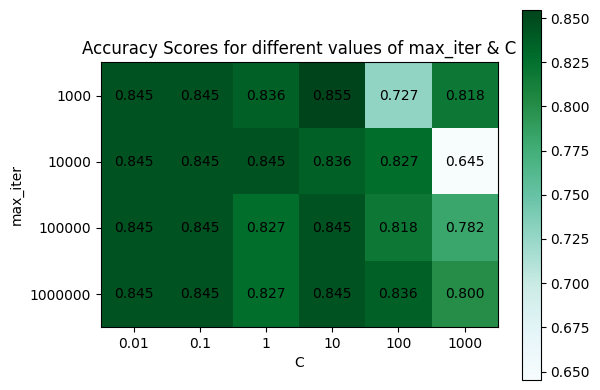

In [8]:
def _linearSVC_classifying(X_subtrain, X_val, y_subtrain, y_val, max_iter_values, _C_values, acc_score_values):
    
    # Loop and fit the LinearSVC for each combination. Print the accuracy score and store.
    for i in max_iter_values:
        for j in _C_values:
            svc = LinearSVC(max_iter=i, C=j, random_state=42)
            
            svc.fit(X_subtrain, y_subtrain)
            y_pred = svc.predict(X_val)
            
            acc_score = accuracy_score(y_val, y_pred)
            acc_score_values.append(acc_score)
            
            print("max_iter and C values: ", i, j, "          -> ", acc_score)
    
    # Convert the acc_score_list to a NumPy array & reshape for the heatmap.
    acc_score_values = np.array(acc_score_values)
    acc_score_values = acc_score_values.reshape(len(max_iter_values), len(_C_values))
    
    return acc_score_values


def create_heatmap(acc_score_values, max_iter_values, _C_values):
    heatmap = plt.imshow(acc_score_values, cmap="BuGn")
    
    plt.colorbar(heatmap)
    
    plt.title("Accuracy Scores for different values of max_iter & C")
    plt.xlabel("C")
    plt.ylabel("max_iter")
    plt.xticks(np.arange(len(_C_values)), _C_values)
    plt.yticks(np.arange(len(max_iter_values)), max_iter_values)

    # Loops through the values of max_iter and C, adding the value of each combination to their respective index on the heatmap.
    # This was done to help provide more insight into the results on the heatmap.
    for i in range(len(max_iter_values)):
        for j in range(len(_C_values)):
            plt.text(j, i, f"{acc_score_values[i][j]:.3f}", ha='center', va='center', color='black', fontsize=10)

    plt.show()
    
    return None


# Train_test_split the data as usual. Then, split the training data into sub-training and validation sets (0.125 of the training).
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

max_iter_values = [1000, 10000, 100000, 1000000]
_C_values = [0.01, 0.1, 1, 10, 100, 1000]
acc_score_values = []

acc_score_values = _linearSVC_classifying(X_subtrain, X_val, y_subtrain, y_val, max_iter_values, _C_values, acc_score_values)
create_heatmap(acc_score_values, max_iter_values, _C_values)

## Call LinearSVC with the best performing max_iter and C values found above
Plot the accuracies on 2 confusion matrixes to visualize the predicting accuracy

Training:  0.7795454545454545


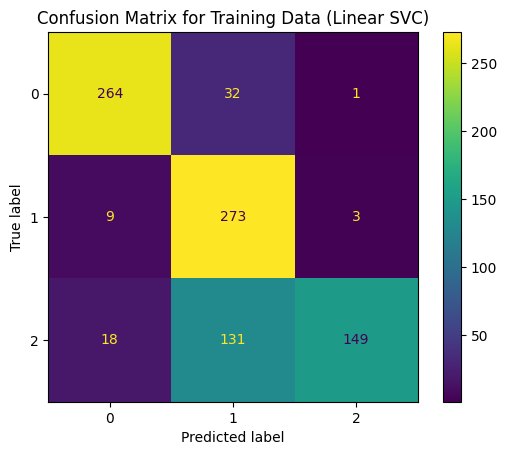

Testing :  0.740909090909091


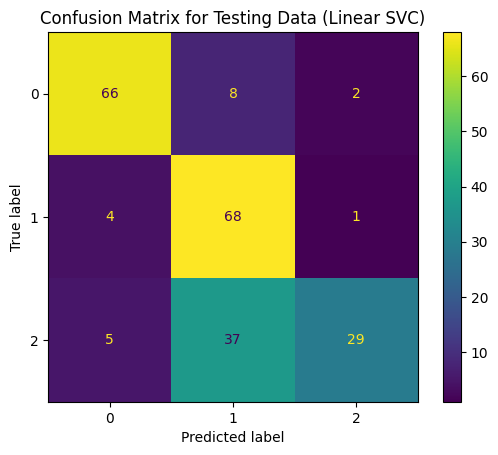

In [9]:
# Using max_iter=1000, C=10 for Linear SVC, fit the training set & compute the training and testing accuracy.

svc = LinearSVC(max_iter=1000, C=10, random_state=42)
svc.fit(X_train, y_train)

y_predict = svc.predict(X_train)
print("Training: ", accuracy_score(y_train, y_predict))
training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (Linear SVC)")
plt.show()

y_predict = svc.predict(X_test)
print("Testing : ", accuracy_score(y_test, y_predict))
testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (Linear SVC)")
plt.show()

## Add feature scaling
- scale the data using StandardScaler
- Results in much better predictions

Training:  0.9068181818181819


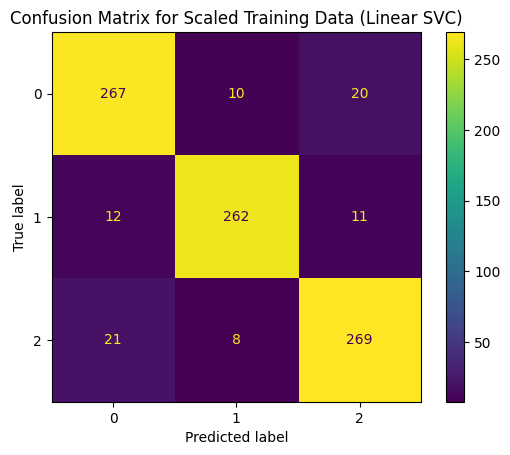

Testing :  0.8772727272727273


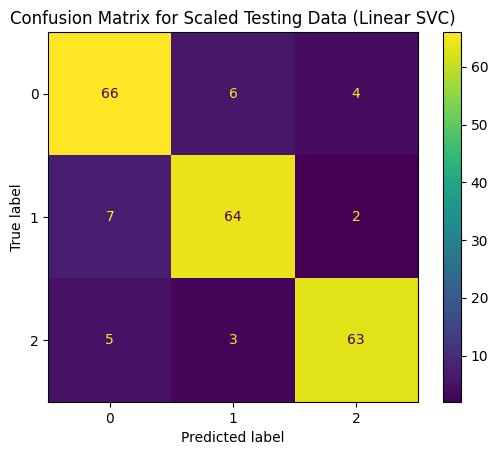

In [11]:
scaler = StandardScaler()
X_scaled_training_data = scaler.fit_transform(X_train)
X_scaled_testing_data = scaler.transform(X_test)

svc = LinearSVC(max_iter=1000, C=10, random_state=42)
svc.fit(X_scaled_training_data, y_train)

y_predict = svc.predict(X_scaled_training_data)

print("Training: ", accuracy_score(y_train, y_predict))
training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Scaled Training Data (Linear SVC)")
plt.show()

y_predict = svc.predict(X_scaled_testing_data)

print("Testing : ", accuracy_score(y_test, y_predict))
testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Scaled Testing Data (Linear SVC)")
plt.show()